In [1]:
os.getcwd()

NameError: name 'os' is not defined

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
chinese_mnist = pd.read_csv(r"C:\Users\15182\Documents\chinese_mnist.csv")
data= (r"C:\Users\15182\Downloads\Chinesemnist data\data")
#data
#chinese_mnist


In [4]:
chinese_mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   suite_id   15000 non-null  int64 
 1   sample_id  15000 non-null  int64 
 2   code       15000 non-null  int64 
 3   value      15000 non-null  int64 
 4   character  15000 non-null  object
dtypes: int64(4), object(1)
memory usage: 586.1+ KB


<Figure size 432x288 with 0 Axes>

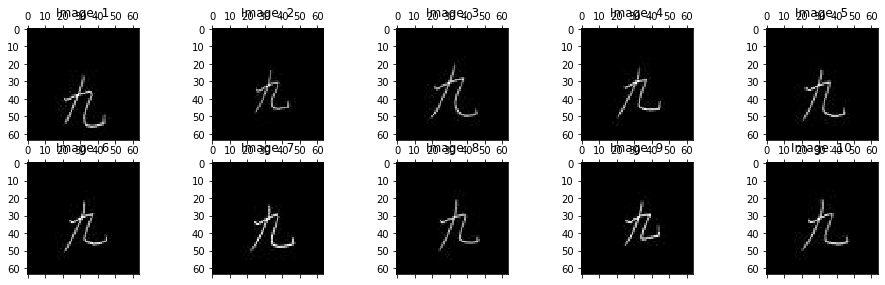

In [6]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

from PIL import Image

import csv 

def writeToCSV(filename, mode, row):
    with open(filename, mode) as csvfile:  
        csvwriter = csv.writer(csvfile)      
        csvwriter.writerow(row)

def main():

    rows = pd.read_csv(r"C:\Users\15182\Downloads\chinesemnist.csv.csv")

    process_images = 15

    images_data = []

    for index, row in rows.iterrows():
        input_path = r"C:\Users\15182\Downloads\Chinesemnist data\data\input_{0}_{1}_{2}.jpg".format(row[0], row[1], row[2])
    
        img_matrix = mpimg.imread(input_path)
        img_pixels = []
        
        for img_row in img_matrix:
            img_pixels.extend(img_row)

        images_data.append(img_pixels) 

        writeToCSV("chinese_mnist_image.csv", "a", img_pixels)

        process_images -= 1
        if(process_images <= 0):
            break  

    df = pd.DataFrame(images_data)

    plt.gray()
    fig = plt.figure( figsize=(16,7) )
    for i in range(10):
        ax = fig.add_subplot(3,5,i+1, title="Image: {}".format(i+1))
        ax.matshow(df.loc[i].values.reshape((64,64)).astype(float))
    #plt.show()
  
main()

In [2]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd


from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

from scipy.linalg import eigh # from scipy of linear algebra1

#matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE



import seaborn as sns

from PIL import Image

import csv 


imageH = 64
imageW = 64
maxRows = 10000

def preprocessing():
    convertImagesIntoCSV(maxRows,r"C:\Users\15182\Downloads\chinesemnist.csv.csv", r"C:\Users\15182\Downloads\Chinesemnist data\data", imageH, imageW)

def main():
    df = pd.read_csv("chinese_mnist_image.csv")
   
    l = df['label'] 
    d = df.drop('label',axis = 1)
    print(l.shape)
    print(d.shape)

    # ploting a sample number visually
    plt.figure(figsize=(5,5))
    idx = 50

    grid_data=d.iloc[idx].values.reshape(imageH, imageW) # reshaping from 1d to 2d
    plt.imshow(grid_data,interpolation='none',cmap='gray')
    plt.show()

    label = l.head(maxRows)
    data = d.head(maxRows)
    print('The shape of data is ',data.shape)

    standard_data = StandardScaler().fit_transform(data)
    sample_data = standard_data

    # Matrix multiplication with numpy
    covar_matrix = np.matmul(sample_data.T, sample_data)
    #print('The shape of co-variance matrix = ',covar_matrix.shape)

    # working with eigen-vectors and eigen-values
    values, vectors = eigh(covar_matrix,eigvals=(4094,4095)) # returns the values and vectors from co-var matrix, top two(4094,4095)
    #print('The shape of eigen vectors is ', vectors.shape)
    
    vectors = vectors.T
    #print('The updated shape of eigen vectors is',vectors.shape)


    
    new_coordinates = np.matmul(vectors,sample_data.T)
    print('The resultent new data points\' shape is ', vectors.shape, 'X', sample_data.T.shape, '=', new_coordinates.shape)
    

    # appending labels with new data set of 2d projection
    new_coordinates = np.vstack((new_coordinates,label)).T
    #print('The shape of new data set is ',new_coordinates.shape)


    # Creating the data frame
    matrix_df = pd.DataFrame(data= new_coordinates,columns=('1st_principal','2nd_principal','labels'))
    print(matrix_df.head(5))
    
    sns.FacetGrid(matrix_df,hue='labels',height=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
    plt.show()
    
    # using SKlearn importing PCA
    pca = decomposition.PCA()

    # PCA for dimensionality redcution (non-visualization)
    pca.n_components = 10
    pca_data = pca.fit_transform(sample_data)

    percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
    print(percentage_var_explained)

    cum_var_explained = np.cumsum(percentage_var_explained)
    #print(cum_var_explained)

    # Plot the PCA spectrum
    plt.figure(1, figsize=(6, 4))

    plt.clf()
    plt.plot(cum_var_explained, linewidth=2)
    plt.axis('tight')
    plt.grid()
    plt.xlabel('n_components')
    plt.ylabel('Cumulative_explained_variance')
    plt.show()

    # directly entering parameters 
    pca.n_components = 3
    pca_data = pca.fit_transform(sample_data)

    print('shape of pca_reduced data = ',pca_data.shape)

    # Data massaging - adding label colomn to the reduced matrix
    pca_data = np.vstack((pca_data.T,label)).T

    # dataframing and plotting the pca data
    pca_df = pd.DataFrame(data=pca_data,
        columns=('1st_principal','2nd_principal','3rd_principal','labels'))

    sns.FacetGrid(pca_df,hue='labels',height=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
    plt.show()

    ax = plt.figure(figsize=(16,10)).gca(projection='3d')
    ax.scatter(
        xs = pca_df["1st_principal"], 
        ys = pca_df["2nd_principal"], 
        zs = pca_df["3rd_principal"], 
        c = pca_df["labels"], 
        cmap = 'tab20'
    )
    ax.set_xlabel('1st_principal')
    ax.set_ylabel('2nd_principal')
    ax.set_zlabel('3rd_principal')
    plt.show()
    #picking 1000 datapoints
    data_1000 = standard_data[0:1000,:]
    label_1000 = label[0:1000]

    data_15k = standard_data[0:15000,:]
    label_15k = label[0:15000]

    model = TSNE(n_components=2,random_state=0)
    tsne_data = model.fit_transform(data_15k)
    tsne_data = np.vstack((tsne_data.T,label_15k)).T
    tsne_df = pd.DataFrame(data=tsne_data,columns=('Dim_1','Dim_2','labels'))
    sns.FacetGrid(tsne_df,hue='labels',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
    plt.show()
    

def writeToCSV(filename, mode, row):
    with open(filename, mode) as csvfile:  
        csvwriter = csv.writer(csvfile)      
        csvwriter.writerow(row)

def convertImagesIntoCSV(max_process_images, csvPath, imagesPath, imageH, imageW):
    
    rows = pd.read_csv(r"C:\Users\15182\Downloads\chinesemnist.csv.csv")

    process_images = max_process_images

    headers = ["label"]
    headers.extend([ 'pixel'+str(i) for i in range(imageH * imageW)])

    writeToCSV("chinese_mnist_image.csv", "w", headers)

    for index, row in rows.iterrows():
        input_path =imagesPath+"/input_{0}_{1}_{2}.jpg".format(row[0], row[1], row[2])
    
        img_matrix = mpimg.imread(input_path)
        img_pixels = [row[3]]
        
        for img_row in img_matrix:
            img_pixels.extend(img_row)

        writeToCSV("chinese_mnist_image.csv", "a", img_pixels)

        process_images -= 1
        if(process_images <= 0):
            break  


#main()
preprocessing()